In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV


from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

plt.rcParams['figure.figsize'] = (10, 6)

#Confusion matrix color schemes
conf_mat_color = sns.diverging_palette(10, 150, as_cmap=True)

### Read in Heart Data

In [2]:
df = pd.read_csv('data/heart.csv')
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


<AxesSubplot:>

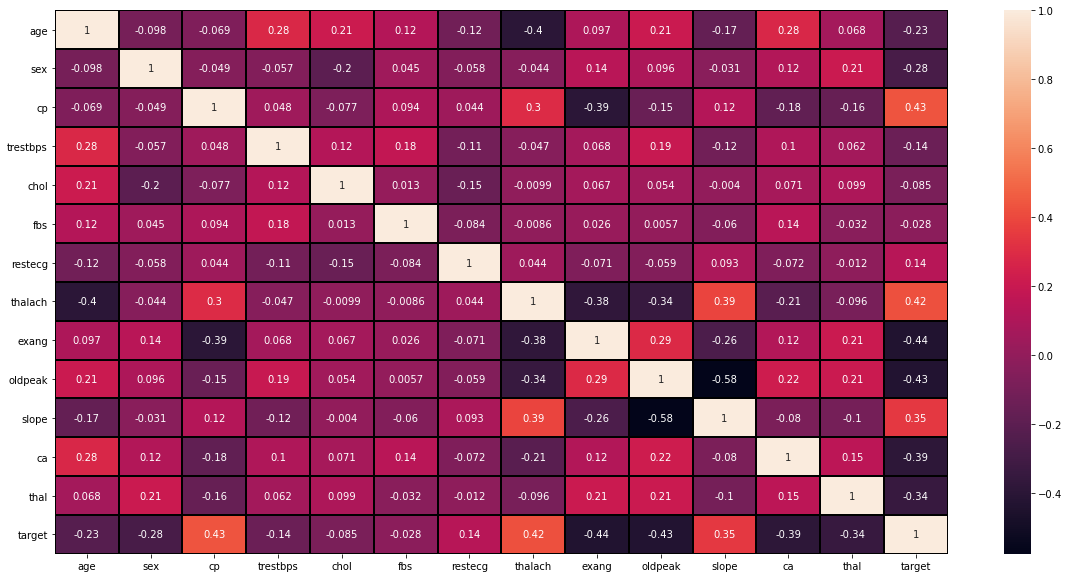

In [4]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), linewidths= 1, linecolor='black',annot=True)

<AxesSubplot:xlabel='target', ylabel='count'>

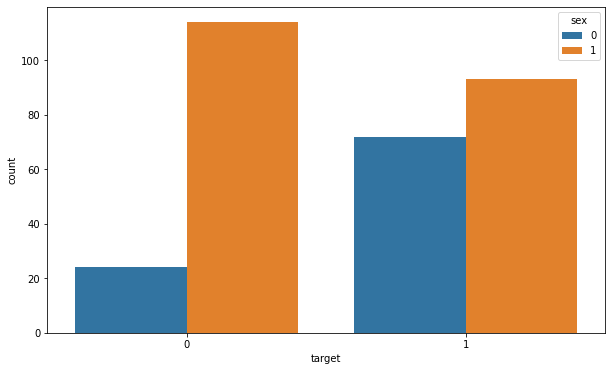

In [5]:
# Examine target variable - Male=1 Female=0
sns.countplot('target', data=df, hue='sex')

In [6]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


In [7]:
# Examine Chest Pain Type
df['cp'].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [8]:
# Examine thal
df['thal'].value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

In [9]:
# Examine slope
df['slope'].value_counts()

2    142
1    140
0     21
Name: slope, dtype: int64

<AxesSubplot:xlabel='age', ylabel='thalach'>

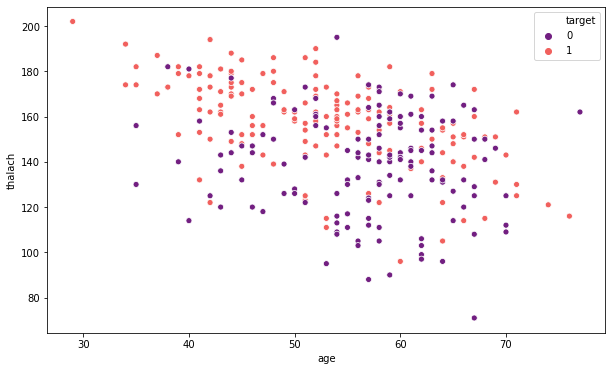

In [10]:
sns.scatterplot(data=df, x='age', y='thalach', hue='target', palette='magma')

## Prep the data for training

In [11]:
X = df.drop('target', axis =1)
y = np.ravel(df['target'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Logistic Regression

#### Logistic Regression with standard paremeters without scaling

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



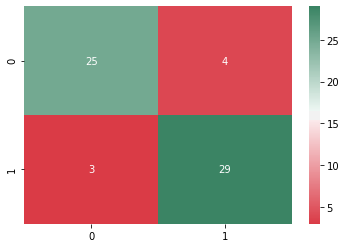

In [12]:
log_d_model = LogisticRegression(max_iter=10000)
log_d_model.fit(X_train, y_train)
pred_log_d_model = log_d_model.predict(X_test)
plt.figure(figsize=(6,4))

sns.heatmap(confusion_matrix(y_test, pred_log_d_model), annot=True, cmap = conf_mat_color)
print('Classification Report:')
print(classification_report(y_test, pred_log_d_model))

#### Logistic Regression with standard paremeters with scaling # This has no effect

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



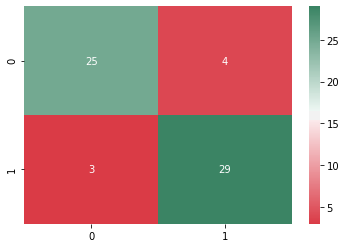

In [13]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

log_s_model = LogisticRegression(max_iter=10000)
log_s_model.fit(X_train, y_train)
pred_log_s_model = log_s_model.predict(X_test)

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, pred_log_s_model), annot=True, cmap = conf_mat_color)
print('Classification Report:')
print(classification_report(y_test, pred_log_s_model))

#### Logistic Regression with Cross Validation

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



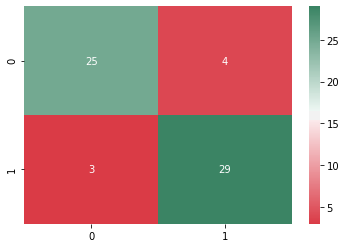

In [14]:
X = df.drop('target', axis =1)
y = np.ravel(df['target'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_cv_model = LogisticRegressionCV(max_iter=10000, cv=100)
log_cv_model.fit(X_train, y_train)

pred_log_cv_model = log_cv_model.predict(X_test)

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, pred_log_cv_model), annot=True, cmap = conf_mat_color)
print('Classification Report:')
print(classification_report(y_test, pred_log_cv_model))

#### Logistic Regression with dummy variables from the categorical variables cp, thal, and slope

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



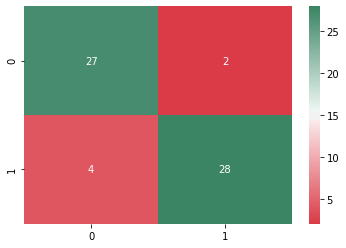

In [15]:
df = pd.read_csv('data/heart.csv')

cp_d = pd.get_dummies(df['cp'], prefix = 'cp')
thal_d = pd.get_dummies(df['thal'], prefix = 'thal')
slope_d = pd.get_dummies(df['slope'], prefix = 'slope')

df = pd.concat([df, cp_d, thal_d, slope_d], axis=1)
df.drop(['cp','slope','thal'], axis = 1, inplace=True)

X = df.drop('target', axis =1)
y = np.ravel(df['target'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_model = LogisticRegression(max_iter=10000)
log_model.fit(X_train, y_train)
pred_log_model = log_model.predict(X_test)

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, pred_log_model), annot=True, cmap = conf_mat_color)
print('Classification Report:')
print(classification_report(y_test, pred_log_model))

#### Logistic Regression with dummy variables (n-1) from the categorical variables cp, thal, and slope

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



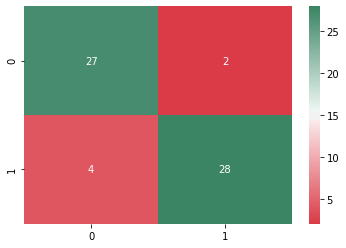

In [16]:
df = pd.read_csv('data/heart.csv')

cp_d = pd.get_dummies(df['cp'], prefix = 'cp', drop_first=True)
thal_d = pd.get_dummies(df['thal'], prefix = 'thal', drop_first=True)
slope_d = pd.get_dummies(df['slope'], prefix = 'slope', drop_first=True)

df = pd.concat([df, cp_d, thal_d, slope_d], axis=1)
df.drop(['cp','slope','thal'], axis = 1, inplace=True)

X = df.drop('target', axis =1)
y = np.ravel(df['target'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_model = LogisticRegression(max_iter=10000)
log_model.fit(X_train, y_train)
pred_log_model = log_model.predict(X_test)

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, pred_log_model), annot=True, cmap = conf_mat_color)
print('Classification Report:')
print(classification_report(y_test, pred_log_model))

#### Logistic Regression with CV and dummy variables from the categorical variables cp, thal, and slope 

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



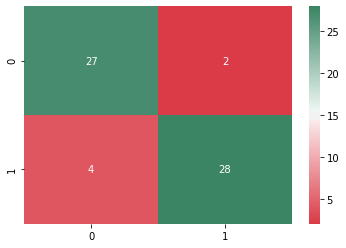

In [17]:
df = pd.read_csv('data/heart.csv')

cp_d = pd.get_dummies(df['cp'], prefix = 'cp', drop_first=True)
thal_d = pd.get_dummies(df['thal'], prefix = 'thal', drop_first=True)
slope_d = pd.get_dummies(df['slope'], prefix = 'slope', drop_first=True)

df = pd.concat([df, cp_d, thal_d, slope_d], axis=1)
df.drop(['cp','slope','thal'], axis = 1, inplace=True)

X = df.drop('target', axis =1)
y = np.ravel(df['target'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_model = LogisticRegressionCV(max_iter=10000, cv=100)
log_model.fit(X_train, y_train)
pred_log_model = log_model.predict(X_test)

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, pred_log_model), annot=True, cmap = conf_mat_color)
print('Classification Report:')
print(classification_report(y_test, pred_log_model))

## K-Nearest Neighbors

In [18]:
def add_dummies(df):
    """
    Add dummy variables to the categorical variables
    """
    cp_d = pd.get_dummies(df['cp'], prefix = 'cp', drop_first=True)
    thal_d = pd.get_dummies(df['thal'], prefix = 'thal', drop_first=True)
    slope_d = pd.get_dummies(df['slope'], prefix = 'slope', drop_first=True)

    df = pd.concat([df, cp_d, thal_d, slope_d], axis=1)
    df.drop(['cp','slope','thal'], axis = 1, inplace=True)
    return df

In [19]:
df = pd.read_csv('data/heart.csv')
# df = add_dummies(df)

X = df.drop('target', axis =1)
y = np.ravel(df['target'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

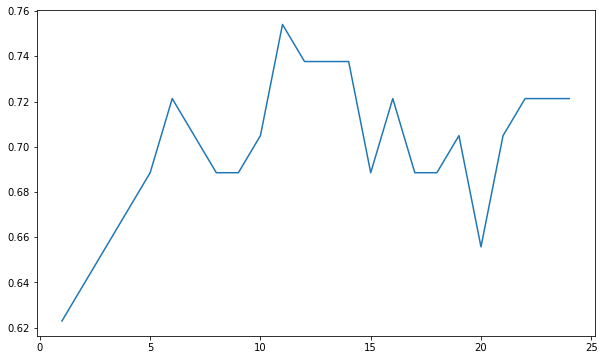

In [20]:
error_rate = []
for i in range (1,25):
    knn = KNeighborsClassifier(n_neighbors= i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    score = knn.score(X_test, y_test)
    error_rate.append(score)
    
plt.plot(range(1,25), error_rate)

## Support Vector Machine

In [21]:
df = pd.read_csv('data/heart.csv')

# Create Dummy Variables
cp_d = pd.get_dummies(df['cp'], prefix = 'cp', drop_first=True)
thal_d = pd.get_dummies(df['thal'], prefix = 'thal', drop_first=True)
slope_d = pd.get_dummies(df['slope'], prefix = 'slope', drop_first=True)

df = pd.concat([df, cp_d, thal_d, slope_d], axis=1)
df.drop(['cp','slope','thal'], axis = 1, inplace=True)

In [38]:
X = df.drop('target', axis=1).values
y = df['target'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Try linear kernel first

In [39]:
svm = SVC(kernel='linear', random_state = 1)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.93      0.86        29
           1       0.93      0.78      0.85        32

    accuracy                           0.85        61
   macro avg       0.86      0.86      0.85        61
weighted avg       0.86      0.85      0.85        61



#### Try scaling with linear kernel

In [37]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

svm = SVC(kernel='linear', random_state = 1)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.83      0.74        29
           1       0.80      0.62      0.70        32

    accuracy                           0.72        61
   macro avg       0.73      0.73      0.72        61
weighted avg       0.74      0.72      0.72        61



#### Use Grid Search on the unscaled SVM model with several kernels

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid={'kernel' :['linear','rbf'],
            'C':[0.1,1,10, 100], 
            'gamma':[1,0.1,0.01, 0.001]}

grid = GridSearchCV(SVC(), param_grid, verbose=0)

grid.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['linear', 'rbf']})

In [42]:
best_model = grid.best_estimator_
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.93      0.86        29
           1       0.93      0.78      0.85        32

    accuracy                           0.85        61
   macro avg       0.86      0.86      0.85        61
weighted avg       0.86      0.85      0.85        61



<bound method BaseEstimator.get_params of SVC(C=1, gamma=1, kernel='linear')>